Let's first setup our imports

In [78]:
import pandas as pd
import numpy as np
from sklearn import cluster
from sklearn import metrics
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import pyplot
from sklearn import datasets
%matplotlib inline

## Step 1: Import and format the data

Sklearn already has the Iris dataset built in, so all we have to do is import it!

In [79]:
from sklearn.datasets import load_iris
data = load_iris()
data.keys

<function keys>

Define the "x" and "y" variables. *Remember*, y is our classifer, and x is our attributes.

In [80]:
y = pd.DataFrame(data.target)
X = pd.DataFrame(data.data, columns = data.feature_names)

## Step 2: Plot the data to estimate clusters

Plot the data using scatterplots - take a look at all the combinations of variables to get a feel for how the data is distributed. 

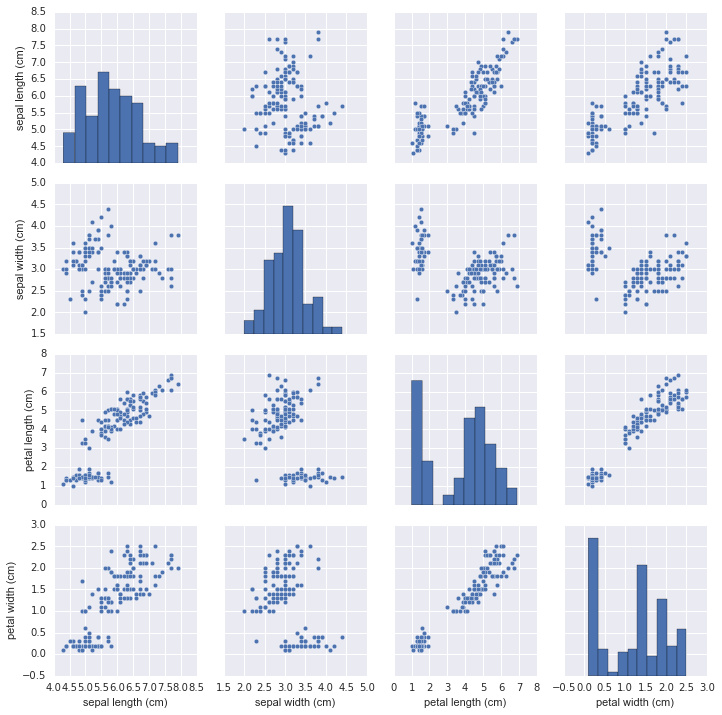

In [81]:
import seaborn as sns
sns.pairplot(X)

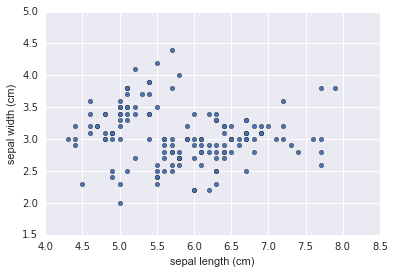

In [92]:
X.plot(kind ='scatter',x='sepal length (cm)', y='sepal width (cm)')

## Step 3: Cluster the data

Run the clustering analysis using scikit-learn.

*Hint*: Estimate the number of clusters, k, based on your visual examination of the distributions.

In [82]:
from sklearn.cluster import KMeans
#estimators = {'k_means_iris_3': KMeans(n_clusters=3),
#              'k_means_iris_8': KMeans(n_clusters=8),
#              'k_means_iris_bad_init': KMeans(n_clusters=3, n_init=1,
#                                              init='random')}

k = 3
kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(X)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
print labels
print  
print centroids
print
print metrics.silhouette_score(X, labels, metric='euclidean')

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]

[[ 6.85        3.07368421  5.74210526  2.07105263]
 [ 5.006       3.418       1.464       0.244     ]
 [ 5.9016129   2.7483871   4.39354839  1.43387097]]

0.552591944521


Compute the labels and centroids

from mpl_toolkits.mplot3d import Axes3D
X1 = X.as_matrix()
fignum = 1
for name, est in estimators.items():
    fig = plt.figure(fignum, figsize=(4, 3))
    plt.clf()
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

    plt.cla()
    est.fit(X)
    labels = est.labels_

    ax.scatter(X1[:, 3], X1[:, 0], X1[:, 2], c=labels.astype(np.float))

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Petal width')
    ax.set_ylabel('Sepal length')
    ax.set_zlabel('Petal length')
    fignum = fignum + 1


## Step 4: Evaluate the clusters

First, go ahead and plot the results of your clustering analysis

Plot the clusters

from mpl_toolkits.mplot3d import Axes3D

fignum = 1
for name, est in estimators.items():
    fig = plt.figure(fignum, figsize=(4, 3))
    plt.clf()
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

    plt.cla()
    est.fit(X)
    labels = est.labels_

    ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=labels.astype(np.float))

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Petal width')
    ax.set_ylabel('Sepal length')
    ax.set_zlabel('Petal length')
    fignum = fignum + 1


Plot the predicted vs actual classifcations to see how our clustering analysis compares

In [87]:
metrics.accuracy_score(labels,y)

0.093333333333333338

Check the centroids to see where each cluster is lying 

In [84]:
metrics.silhouette_score(y,labels,metric='euclidean')

0.70172421600536772

Check the labels of the clusters

In [85]:
print metrics.classification_report(y,labels)

             precision    recall  f1-score   support

          0       0.00      0.00      0.00        50
          1       0.00      0.00      0.00        50
          2       0.23      0.28      0.25        50

avg / total       0.08      0.09      0.08       150



In [86]:
metrics.confusion_matrix(y,labels)

array([[ 0, 50,  0],
       [ 2,  0, 48],
       [36,  0, 14]])

Compute the accuracy score using scikit to see how accurate our analysis is

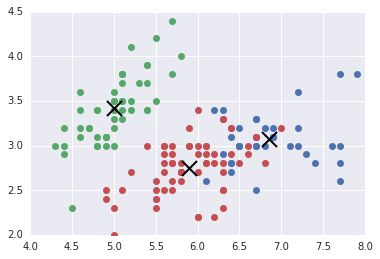

In [89]:
for i in range(k):
    ds = data.data[np.where(labels==i)]
    plt.plot(ds[:,0],ds[:,1],'o')
    lines = plt.plot(centroids[i,0],centroids[i,1],'kx')
    plt.setp(lines,ms=15.0)
    plt.setp(lines,mew=2.0)

plt.show()

Compute the silhoutte coefficient to see how consistent our data is within the clusters

Calculate the Precision, Recall, and F - Score to see the test's accuracy

Compute the Confusion Matrix to test the performance of the clustering analysis